# PRIMERA ENTREGA DATA SCIENCE I

#### Introducción

##### Se optó por el DATASET de películas de IMDB. Las razones son variadas, pero la primera y principal es que hay información muy interesante en este DATASET ya que refleja los géneros predominantes a lo largo de décadas; un viaje en el tiempo. Y segundo, se adapta a los lineamientos/ requerimientos del TP.

##### Fuente del DATASET: TBD

##### Algunas series que incluye este DATASET son: release-date, budget, popularity, genres, vote_count, runtime, revenue

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import cumsum
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20
from bokeh.models.glyphs import Wedge

In [2]:
# cargamos el dataset remoto
# Aproximación de cómo están compuestos los datos

url = "https://drive.matanga.com.ar/api/public/dl/09H6hg16/imdb_dataset.csv"

df = pd.read_csv(url, sep=",")
df.head().T

,0,1,2,3,4
id,27205,157336,155,19995,24428
title,Inception,Interstellar,The Dark Knight,Avatar,The Avengers
vote_average,8.364,8.417,8.512,7.573,7.71
vote_count,34495,32571,30619,29815,29166
status,Released,Released,Released,Released,Released
release_date,7/15/2010,11/5/2014,7/16/2008,12/15/2009,4/25/2012
revenue,825532764,701729206,1004558444,2923706026,1518815515
runtime,148,169,152,162,143
adult,False,False,False,False,False
budget,160000000,165000000,185000000,237000000,220000000


#### Descripción del DATASET, serie a serie

##### - id: identificador único - key
##### - title: titulo de la película
##### - vote_average: promedio del total de votos
##### - vote_count: contador de votos
##### - status: estado actual de la película
##### - release_date: fecha de lanzamiento
##### - revenue: ganancias obtenidas
##### - runtime: tiempo total de reproducción
##### - adult: si pertenece a la categoría de adultos
##### - budget: presupuesto que se gastó en la película
##### - imdb_id: identificador interno de IMDB
##### - original_language: lengua nativa de la película
##### - original_title: título original
##### - overview: trama superficial de la película
##### - popularity: popularidad
##### - tagline: etiquetas que representan a la película
##### - genres: géneros a los que pertenece la película
##### - production_companies: compañías que produjeron la película
##### - production_countries: países que participaron de la realización de la película
##### - spoken_languages: lenguas a las que la película fue doblada
##### - keywords: palabras clave que representan a la película

#### Audiencia/ Público al que está dirigido este NOTEBOOK

##### Público general

In [3]:
# mostramos las columnas

df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [4]:
# mostramos la cantidad de series

len(df.columns)

21

In [71]:
# mostramos descripcion del dataframe

df.describe().T.round()

,count,mean,min,25%,50%,75%,max,std
id,1048575.0,754688.796065,2.0,384662.5,818379.0,1140640.5,1411041.0,420745.702642
vote_average,1048575.0,2.04156,0.0,0.0,0.0,5.0,10.0,3.097234
vote_count,1048575.0,20.455842,0.0,0.0,0.0,1.0,34495.0,331.566881
release_date,864788,2000-04-28 01:29:31.201265280,1900-01-01 00:00:00,1989-06-06 00:00:00,2010-10-16 00:00:00,2019-01-09 00:00:00,2099-11-18 00:00:00,NaN
revenue,1048575.0,760411.204701,-12.0,0.0,0.0,0.0,4999999999.0,19449249.109767
runtime,1048575.0,48.226096,-28.0,0.0,23.0,89.0,14400.0,60.578225
budget,1048575.0,291323.162632,0.0,0.0,0.0,0.0,999999999.0,5319290.155414
popularity,1048575.0,1.276393,0.0,0.6,0.6,0.917,2994.357,7.889555


In [5]:
# informacion del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

In [6]:
# chequeamos los valores que faltan

df.isnull().sum().sort_values(ascending=False)

tagline                 895847
keywords                755954
production_companies    568428
imdb_id                 488003
production_countries    463497
spoken_languages        440662
genres                  414972
overview                215824
release_date            181817
title                       13
original_title              13
vote_average                 0
id                           0
status                       0
vote_count                   0
original_language            0
adult                        0
revenue                      0
budget                       0
runtime                      0
popularity                   0
dtype: int64

In [7]:
output = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() != 0].to_dict()

print("Las series que tienen valores nulos son:")
for key, value in output.items():
    print(" - " + key + " con " + str(value) + " faltantes")

Las series que tienen valores nulos son:
 - tagline con 895847 faltantes
 - keywords con 755954 faltantes
 - production_companies con 568428 faltantes
 - imdb_id con 488003 faltantes
 - production_countries con 463497 faltantes
 - spoken_languages con 440662 faltantes
 - genres con 414972 faltantes
 - overview con 215824 faltantes
 - release_date con 181817 faltantes
 - title con 13 faltantes
 - original_title con 13 faltantes


In [8]:
# chequeamos los valores que faltan, pero se muestran los porcentajes en este caso

print("Los porcentajes de faltantes por serie")
output = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() != 0] / len(df) * 100

output.apply(lambda x: int(x * 100) / 100)

Los porcentajes de faltantes por serie


tagline                 85.43
keywords                72.09
production_companies    54.20
imdb_id                 46.53
production_countries    44.20
spoken_languages        42.02
genres                  39.57
overview                20.58
release_date            17.33
title                    0.00
original_title           0.00
dtype: float64

In [44]:
# chequeo el contenido de la serie "id"

df["id"].head()

0     27205
1    157336
2       155
3     19995
4     24428
Name: id, dtype: int64

In [76]:
df["id"].describe()

count    1.048575e+06
mean     7.546888e+05
std      4.207457e+05
min      2.000000e+00
25%      3.846625e+05
50%      8.183790e+05
75%      1.140640e+06
max      1.411041e+06
Name: id, dtype: float64

In [45]:
# chequeo el contenido de la serie "title"

df["title"].head()

0          Inception
1       Interstellar
2    The Dark Knight
3             Avatar
4       The Avengers
Name: title, dtype: object

In [46]:
# chequeo el contenido de la serie "vote_average"

df["vote_average"].head()

0    8.364
1    8.417
2    8.512
3    7.573
4    7.710
Name: vote_average, dtype: float64

In [47]:
# chequeo el contenido de la serie "vote_count"

df["vote_count"].head()

0    34495
1    32571
2    30619
3    29815
4    29166
Name: vote_count, dtype: int64

In [75]:
df["vote_count"].describe()

count    1.048575e+06
mean     2.045584e+01
std      3.315669e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.449500e+04
Name: vote_count, dtype: float64

In [48]:
# chequeo el contenido de la serie "status"

df["status"].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [72]:
set(df["status"].values)

{'Canceled',
 'In Production',
 'Planned',
 'Post Production',
 'Released',
 'Rumored'}

In [77]:
df["status"].describe()

count      1048575
unique           6
top       Released
freq       1022770
Name: status, dtype: object

In [49]:
# chequeo el contenido de la serie "release_date"

df["release_date"].head()

0   2010-07-15
1   2014-11-05
2   2008-07-16
3   2009-12-15
4   2012-04-25
Name: release_date, dtype: datetime64[ns]

In [50]:
# chequeo el contenido de la serie "revenue"

df["revenue"].head()

0     825532764
1     701729206
2    1004558444
3    2923706026
4    1518815515
Name: revenue, dtype: int64

In [74]:
df["revenue"].describe()

count    1.048575e+06
mean     7.604112e+05
std      1.944925e+07
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+09
Name: revenue, dtype: float64

In [51]:
# chequeo el contenido de la serie "runtime"

df["runtime"].head()

0    148
1    169
2    152
3    162
4    143
Name: runtime, dtype: int64

In [78]:
df["runtime"].describe()

count    1.048575e+06
mean     4.822610e+01
std      6.057823e+01
min     -2.800000e+01
25%      0.000000e+00
50%      2.300000e+01
75%      8.900000e+01
max      1.440000e+04
Name: runtime, dtype: float64

In [52]:
# chequeo el contenido de la serie "adult"

df["adult"].head()

0    False
1    False
2    False
3    False
4    False
Name: adult, dtype: bool

In [53]:
# chequeo el contenido de la serie "budget"

df["budget"].head()

0    160000000
1    165000000
2    185000000
3    237000000
4    220000000
Name: budget, dtype: int64

In [79]:
df["budget"].describe()

count    1.048575e+06
mean     2.913232e+05
std      5.319290e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+09
Name: budget, dtype: float64

In [54]:
# chequeo el contenido de la serie "imdb_id"

df["imdb_id"].head()

0    tt1375666
1    tt0816692
2    tt0468569
3    tt0499549
4    tt0848228
Name: imdb_id, dtype: object

In [55]:
# chequeo el contenido de la serie "original_language"

df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [69]:
set(df["original_language"].values)

{'aa',
 'ab',
 'af',
 'ak',
 'am',
 'an',
 'ar',
 'as',
 'av',
 'ay',
 'az',
 'ba',
 'be',
 'bg',
 'bi',
 'bm',
 'bn',
 'bo',
 'br',
 'bs',
 'ca',
 'ce',
 'ch',
 'cn',
 'co',
 'cr',
 'cs',
 'cv',
 'cy',
 'da',
 'de',
 'dv',
 'dz',
 'el',
 'en',
 'eo',
 'es',
 'et',
 'eu',
 'fa',
 'ff',
 'fi',
 'fj',
 'fo',
 'fr',
 'fy',
 'ga',
 'gd',
 'gl',
 'gn',
 'gu',
 'gv',
 'ha',
 'he',
 'hi',
 'hr',
 'ht',
 'hu',
 'hy',
 'hz',
 'ia',
 'id',
 'ie',
 'ig',
 'ik',
 'is',
 'it',
 'iu',
 'ja',
 'jv',
 'ka',
 'kg',
 'ki',
 'kj',
 'kk',
 'kl',
 'km',
 'kn',
 'ko',
 'ks',
 'ku',
 'kv',
 'kw',
 'ky',
 'la',
 'lb',
 'lg',
 'li',
 'ln',
 'lo',
 'lt',
 'lv',
 'mg',
 'mh',
 'mi',
 'mk',
 'ml',
 'mn',
 'mo',
 'mr',
 'ms',
 'mt',
 'my',
 'nb',
 'nd',
 'ne',
 'nl',
 'nn',
 'no',
 'nr',
 'nv',
 'ny',
 'oc',
 'oj',
 'om',
 'or',
 'os',
 'pa',
 'pl',
 'ps',
 'pt',
 'qu',
 'rm',
 'rn',
 'ro',
 'ru',
 'rw',
 'sa',
 'sc',
 'sd',
 'se',
 'sg',
 'sh',
 'si',
 'sk',
 'sl',
 'sm',
 'sn',
 'so',
 'sq',
 'sr',
 'ss',
 'st',

In [80]:
df["original_language"].describe()

count     1048575
unique        172
top            en
freq       566257
Name: original_language, dtype: object

In [56]:
# chequeo el contenido de la serie "original_title"

df["original_title"].head()

0          Inception
1       Interstellar
2    The Dark Knight
3             Avatar
4       The Avengers
Name: original_title, dtype: object

In [65]:
# chequeo el contenido de la serie "overview"

df["overview"].head()

0    Cobb, a skilled thief who commits corporate es...
1    The adventures of a group of explorers who mak...
2    Batman raises the stakes in his war on crime. ...
3    In the 22nd century, a paraplegic Marine is di...
4    When an unexpected enemy emerges and threatens...
Name: overview, dtype: object

In [58]:
# chequeo el contenido de la serie "popularity"

df["popularity"].head()

0     83.952
1    140.241
2    130.643
3     79.932
4     98.082
Name: popularity, dtype: float64

In [81]:
df["popularity"].describe()

count    1.048575e+06
mean     1.276393e+00
std      7.889555e+00
min      0.000000e+00
25%      6.000000e-01
50%      6.000000e-01
75%      9.170000e-01
max      2.994357e+03
Name: popularity, dtype: float64

In [59]:
# chequeo el contenido de la serie "tagline"

df["tagline"].head()

0                 Your mind is the scene of the crime.
1    Mankind was born on Earth. It was never meant ...
2                    Welcome to a world without rules.
3                          Enter the world of Pandora.
4                              Some assembly required.
Name: tagline, dtype: object

In [60]:
# chequeo el contenido de la serie "genres"

df["genres"].head()

0             Action, Science Fiction, Adventure
1              Adventure, Drama, Science Fiction
2                 Drama, Action, Crime, Thriller
3    Action, Adventure, Fantasy, Science Fiction
4             Science Fiction, Action, Adventure
Name: genres, dtype: object

In [61]:
# chequeo el contenido de la serie "production_companies"

df["production_companies"].head()

0    Legendary Pictures, Syncopy, Warner Bros. Pict...
1    Legendary Pictures, Syncopy, Lynda Obst Produc...
2    DC Comics, Legendary Pictures, Syncopy, Isobel...
3    Dune Entertainment, Lightstorm Entertainment, ...
4                                       Marvel Studios
Name: production_companies, dtype: object

In [62]:
# chequeo el contenido de la serie "production_countries"

df["production_countries"].head(10)

0    United Kingdom, United States of America
1    United Kingdom, United States of America
2    United Kingdom, United States of America
3    United States of America, United Kingdom
4                    United States of America
5                    United States of America
6                    United States of America
7                    United States of America
8                    United States of America
9                    United States of America
Name: production_countries, dtype: object

In [63]:
# chequeo el contenido de la serie "spoken_languages"

df["spoken_languages"].head(10)

0    English, French, Japanese, Swahili
1                               English
2                     English, Mandarin
3                      English, Spanish
4               English, Hindi, Russian
5                               English
6                        English, Xhosa
7                               English
8                               English
9              English, Spanish, French
Name: spoken_languages, dtype: object

In [64]:
# chequeo el contenido de la serie "keywords"

df["keywords"].head(10)

0    rescue, mission, dream, airplane, paris, franc...
1    rescue, future, spacecraft, race against time,...
2    joker, sadism, chaos, secret identity, crime f...
3    future, society, culture clash, space travel, ...
4    new york city, superhero, shield, based on com...
5    superhero, anti hero, mercenary, based on comi...
6    sacrifice, magic, superhero, based on comic, s...
7    dual identity, rage and hate, based on novel o...
8    spacecraft, based on comic, space, orphan, adv...
9    drug dealer, boxer, massage, stolen money, bri...
Name: keywords, dtype: object

#### Hipótesis planteadas

##### 1) La popularidad o interés por las películas de Ciencia Ficción comenzó a partir de la década de 1940 y se mantuvo por varios años
##### 2) El estado más común en todos los géneros es: LANZAMIENTO (released)
##### 3) En la década de 2010 hubo la mayor cantidad de películas registradas

#### Hipótesis (1)

In [83]:
# no borrar, util para que funcione en notebook
output_notebook()

# dividir los generos y expandir
df['genres_split'] = df['genres'].str.split('|')
genres_exploded = df.explode('genres_split')

# funcion para calcular la popularidad promedio por año
def calculate_popularity_by_year(data, genre):
    genre_data = data[data['genres_split'] == genre]
    genre_data = genre_data.dropna(subset=['release_date'])  # Evitar nulos
    genre_data.loc[:, 'release_year'] = pd.to_datetime(genre_data['release_date'], errors='coerce').dt.year
    return genre_data.groupby('release_year')['popularity'].mean().reset_index()

# calculo de la popularidad promedio por genero
action_popularity = calculate_popularity_by_year(genres_exploded, 'Action')
comedy_popularity = calculate_popularity_by_year(genres_exploded, 'Comedy')
horror_popularity = calculate_popularity_by_year(genres_exploded, 'Horror')
adventure_popularity = calculate_popularity_by_year(genres_exploded, 'Adventure')
sci_fi_popularity = calculate_popularity_by_year(genres_exploded, 'Science Fiction')

# estructura de datos para hacer el grafico
action_source = ColumnDataSource(data={'year': action_popularity['release_year'], 'popularity': action_popularity['popularity']})
comedy_source = ColumnDataSource(data={'year': comedy_popularity['release_year'], 'popularity': comedy_popularity['popularity']})
horror_source = ColumnDataSource(data={'year': horror_popularity['release_year'], 'popularity': horror_popularity['popularity']})
adventure_source = ColumnDataSource(data={'year': adventure_popularity['release_year'], 'popularity': adventure_popularity['popularity']})
sci_fi_source = ColumnDataSource(data={'year': sci_fi_popularity['release_year'], 'popularity': sci_fi_popularity['popularity']})

# grafico interactivo
p = figure(height=600, width=1000, title="Evolución de la Popularidad por Género y Año",
           x_axis_label="Año", y_axis_label="Popularidad Promedio", tools="pan,wheel_zoom,box_zoom,reset,save")

# se añade soporte para muteado de cada leyenda
p.line(x='year', y='popularity', source=action_source, line_width=2, color="blue", legend_label="Acción", muted_alpha=0.2)
p.line(x='year', y='popularity', source=comedy_source, line_width=2, color="green", legend_label="Comedia", muted_alpha=0.2)
p.line(x='year', y='popularity', source=horror_source, line_width=2, color="red", legend_label="Terror", muted_alpha=0.2)
p.line(x='year', y='popularity', source=adventure_source, line_width=2, color="orange", legend_label="Aventura", muted_alpha=0.2)
p.line(x='year', y='popularity', source=sci_fi_source, line_width=2, color="purple", legend_label="Ciencia Ficción", muted_alpha=0.2)

# leyenda interactiva
p.legend.location = "top_left"
p.legend.title = "Género"
p.legend.click_policy = "mute"  # modificador de leyendas
p.xgrid.grid_line_color = None

# Mostrar el gráfico
show(p)

Loading BokehJS ...

#### Hippótesis (2)

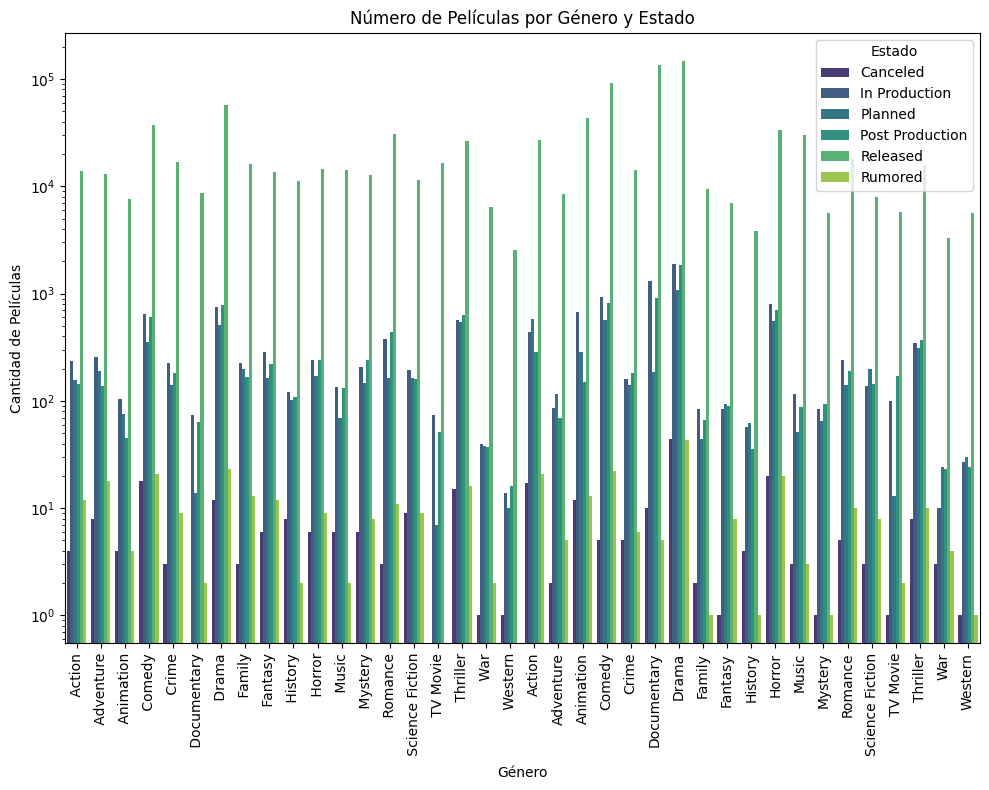

In [34]:
# dividir los generos y expandir
df['genres_split'] = df['genres'].str.split(',')
genres_exploded = df.explode('genres_split')

# contar peliculas por genero y estado
genre_status_count = genres_exploded.groupby(['genres_split', 'status']).size().reset_index(name='count')

# grafico de barras
plt.figure(figsize=(10, 8))
sns.barplot(
    data=genre_status_count,
    x='genres_split',
    y='count',
    hue='status',
    palette='viridis'
)

plt.yscale('log')
plt.title("Número de Películas por Género y Estado")
plt.xlabel("Género")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=90)
plt.legend(title="Estado")
plt.tight_layout()
plt.show()

#### Hipótesis (3)

In [82]:
# Asegurar que la columna release_date esté en formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Filtrar películas con estado "Released"
released_movies = df.loc[df['status'] == 'Released'].copy()

# Extraer el año de lanzamiento y calcular la década
released_movies['release_year'] = released_movies['release_date'].dt.year
released_movies['decade'] = (released_movies['release_year'] // 10) * 10

# Contar películas por década
decade_counts = released_movies.groupby('decade').size().reset_index(name='count')

# Calcular proporciones y ángulos
decade_counts['angle'] = decade_counts['count'] / decade_counts['count'].sum() * 2 * np.pi
decade_counts['percentage'] = decade_counts['count'] / decade_counts['count'].sum() * 100  # calculo de porcentaje

# Usar una paleta con más colores (Category20 para hasta 20 décadas)
palette = Category20[len(decade_counts)] if len(decade_counts) <= 20 else Category20[20]

# Si hay más décadas que colores, ciclar los colores
decade_counts['color'] = [palette[i % len(palette)] for i in range(len(decade_counts))]

# Crear una fuente de datos para Bokeh
source = ColumnDataSource(data=decade_counts)

# grafico de torta
p = figure(
    height=800,
    width=800,
    title="Porcentaje de Películas 'Released' por Década",
    toolbar_location=None,
    tools="tap,hover",
    tooltips="@decade: @count películas (@percentage{0.1f}%)"
)

p.wedge(
    x=0, y=0, radius=0.7,  # tamaño del grafico
    start_angle=cumsum('angle', include_zero=True),
    end_angle=cumsum('angle'),
    line_color="white",
    fill_color='color',
    source=source,
    legend_field='decade'
)

# Configurar la leyenda
p.legend.title = "Década"
p.legend.orientation = "vertical"
p.legend.location = "top_left"

# Personalización
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

# Mostrar el gráfico
show(p)

#### Conclusiones

##### La hipótesis (1) se cumple ya que como se observa en el gráfico la pendiente es positiva y muy empinada alrededor de 1940 para la popularidad y se mantiene a lo largo de varios años.
##### La hipótesis (2) se cumple, el gráfico en el eje Y es logarítmico, y se puede ver que la mayoría de las peículas se encuentran en estado de lanzamiento, muy por encima de otros estados.
##### La hipótesis (3) se cumple, se observa en el gráfico de torta que la porción más grande representa la década de 2010, siendo la década que tiene mayor cantidad de películas registradas en la historia hasta el momento.